# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
dataset = fetch_openml("mnist_784")

In [3]:
x, y = dataset['data'], dataset['target']

### Now take a look at the shapes of the X and y matricies 

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [6]:
x.iloc[36000]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 36000, Length: 784, dtype: float64

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

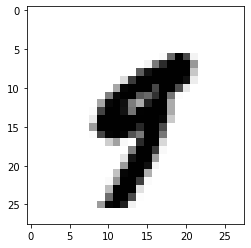

In [7]:
import matplotlib.pyplot as plt

plt.imshow(np.array(x.loc[36000]).reshape(28,28), cmap = plt.cm.binary, interpolation='nearest')

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [9]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [10]:
x_train = x[0:60000]
x_test = x[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [11]:
y_train = np.where(y[0:60000] == '5', 1, 0)
y_test = np.where(y[60000:] == '5', 1, 0)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\matui\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Does the classifier predict correctly the 36000th digit we picked before?

In [13]:
lr.predict([x.iloc[36000]]).item()

0

In [14]:
#Model is working

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [16]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        return np.zeros((len(x), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [18]:
never_5_clf.fit(x_train, y_train)

In [19]:
y_pred_never_5 = never_5_clf.predict(x_test)
y_pred_never_5

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred_lr = lr.predict(x_test)

print('Logistic Regression:')
print(' ')
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred_lr))
print('-------------------')
print(f'Accuracy = {accuracy_score(y_test, y_pred_lr).round(4)}')
print(f'Precision = {precision_score(y_test, y_pred_lr, zero_division=0).round(4)}')
print(f'Recall = {recall_score(y_test, y_pred_lr).round(4)}')
print(f'F1 score = {f1_score(y_test, y_pred_lr).round(4)}')

print(' ')
print(' ')

print('Never 5 classifier:')
print(' ')
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred_never_5))
print('-------------------')
print(f'Accuracy = {accuracy_score(y_test, y_pred_never_5).round(4)}')
print(f'Precision = {precision_score(y_test, y_pred_never_5, zero_division=0).round(4)}')
print(f'Recall = {recall_score(y_test, y_pred_never_5).round(4)}')
print(f'F1 score = {f1_score(y_test, y_pred_never_5).round(4)}')

Logistic Regression:
 
Confusion matrix:
[[9034   74]
 [ 147  745]]
-------------------
Accuracy = 0.9779
Precision = 0.9096
Recall = 0.8352
F1 score = 0.8708
 
 
Never 5 classifier:
 
Confusion matrix:
[[9108    0]
 [ 892    0]]
-------------------
Accuracy = 0.9108
Precision = 0.0
Recall = 0.0
F1 score = 0.0


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
#Logistic Regression has overall good scores
#Never 5 classifier has a good accuracy but all other elements = 0

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

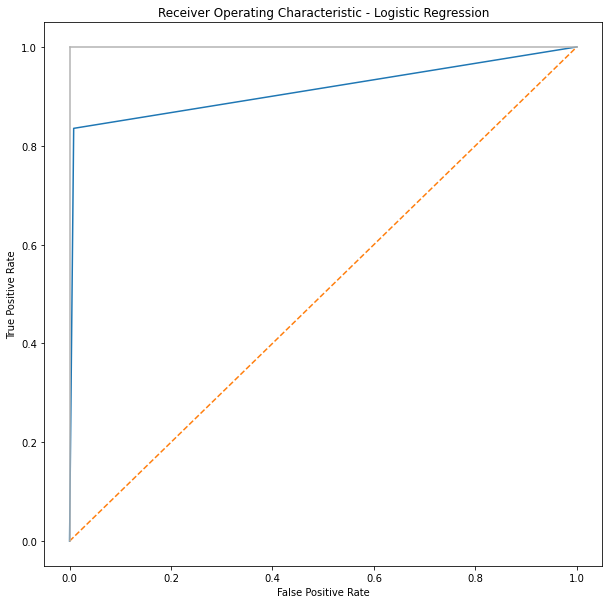

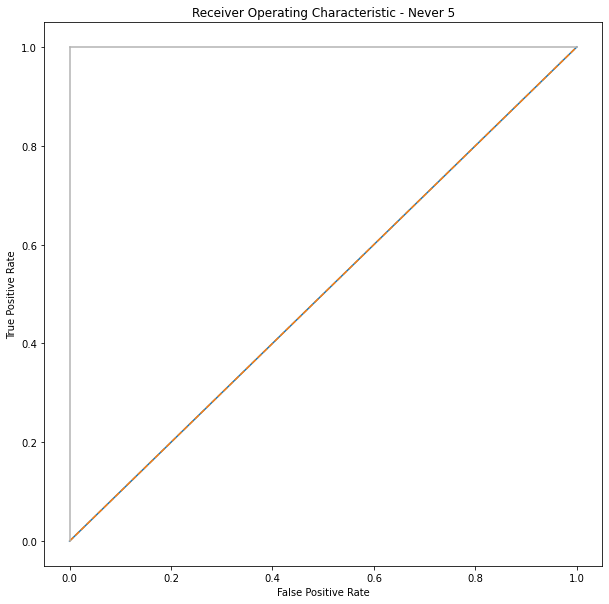

In [25]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

#Calculating true positive and false positive rate for both models
false_positive_rate_lr, true_positive_rate_lr, threshold_lr = roc_curve(y_test, y_pred_lr)
false_positive_rate_n5, true_positive_rate_n5, threshold_n5 = roc_curve(y_test, y_pred_never_5)

#roc_auc score
roc_auc_lr = auc(false_positive_rate_lr, true_positive_rate_lr)
roc_auc_n5 = auc(false_positive_rate_n5, true_positive_rate_n5)

#Plot
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate_lr, true_positive_rate_lr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Never 5')
plt.plot(false_positive_rate_n5, true_positive_rate_n5)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Now find the roc_auc_score for each. 

In [26]:
from sklearn.metrics import roc_auc_score

print(f' ROC_AUC score for Logisitic Regression = {roc_auc_score(y_test, y_pred_lr).round(4)}')
print(f' ROC_AUC score for Never 5 Classifier = {roc_auc_score(y_test, y_pred_never_5).round(4)}')

 ROC_AUC score for Logisitic Regression = 0.9135
 ROC_AUC score for Never 5 Classifier = 0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# AUC ROC is equal to 100% for a perfect model and to 50% for a non-informative one
# The Logistic Regression model works very well
# Never 5 Classifier model has no discrimination capacity to distinguish between positive class and negative class